In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from string import ascii_letters
sns.set_theme(style="white")


In [ ]:
# https://cmdlinetips.com/2020/02/lower-triangle-correlation-heatmap-python/
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-multicollinear-py

In [ ]:
#generate a large random dataset

rs = np.random.RandomState(33)
d = pd.DataFrame(data= rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))


In [ ]:
# compute corr mtrix

In [ ]:
corr = d.corr()

In [ ]:
# mask off

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))

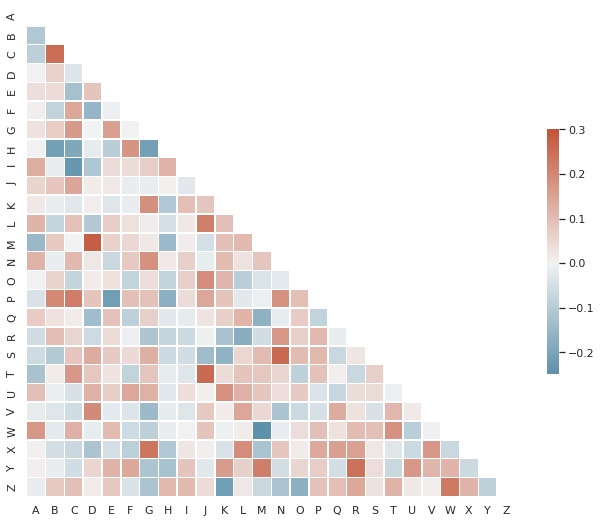

In [ ]:
# set up matplot figure
f, ax = plt.subplots(figsize=(11,9))
# gen diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# draw heatmap w mask
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#plt.tight_layout()



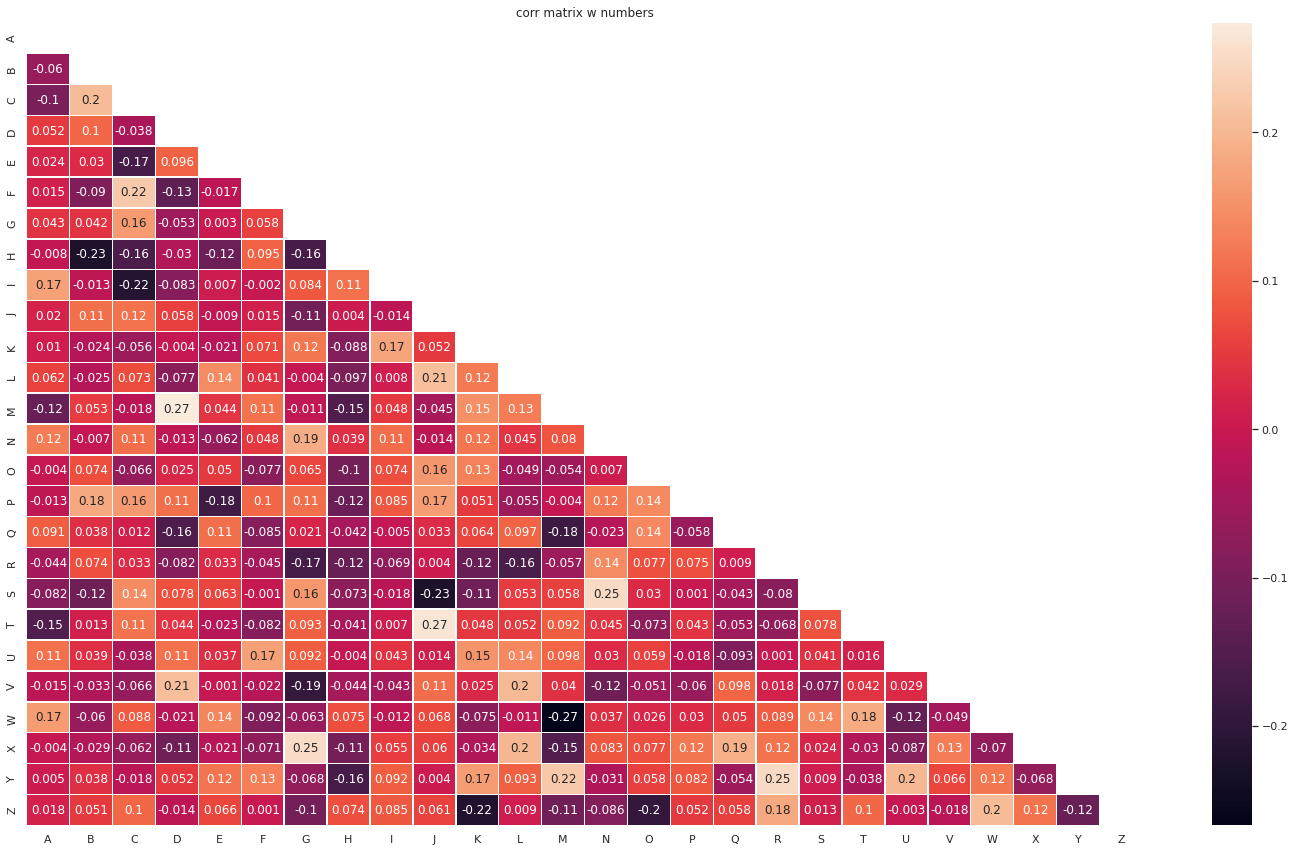

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(round(d.corr(method='spearman'), 3), mask=mask, annot=True, linewidths=0.5)
plt.title('corr matrix w numbers')
plt.tight_layout()
plt.show()


In [ ]:
# import breast cancer data
# https://realpython.com/numpy-scipy-pandas-correlation-python/
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()




In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
corr_df = corr = df.corr(method='pearson')

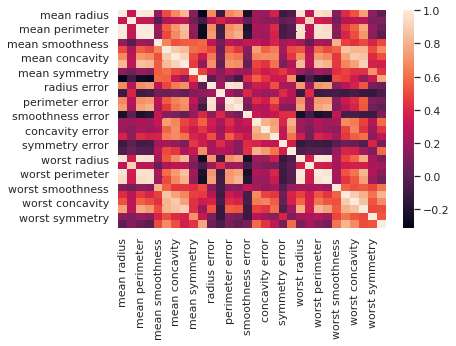

In [ ]:
hmap = sns.heatmap(corr_df)


In [ ]:
np.tril(np.ones(corr_df.shape)).astype(np.bool)[0:5, 0:5]

array([[ True, False, False, False, False],
       [ True,  True, False, False, False],
       [ True,  True,  True, False, False],
       [ True,  True,  True,  True, False],
       [ True,  True,  True,  True,  True]])

In [ ]:
np.triu(np.ones(corr_df.shape)).astype(np.bool)[0:5, 0:5]

array([[ True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False, False,  True]])

In [ ]:
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(np.bool))

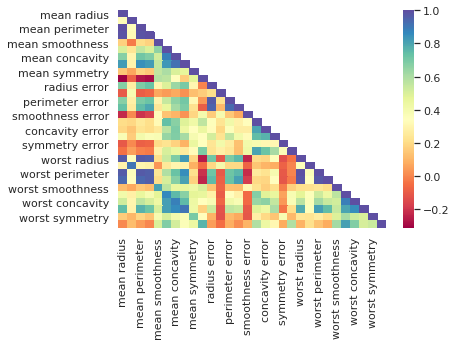

In [ ]:
hmap = sns.heatmap(df_lt, cmap='Spectral')

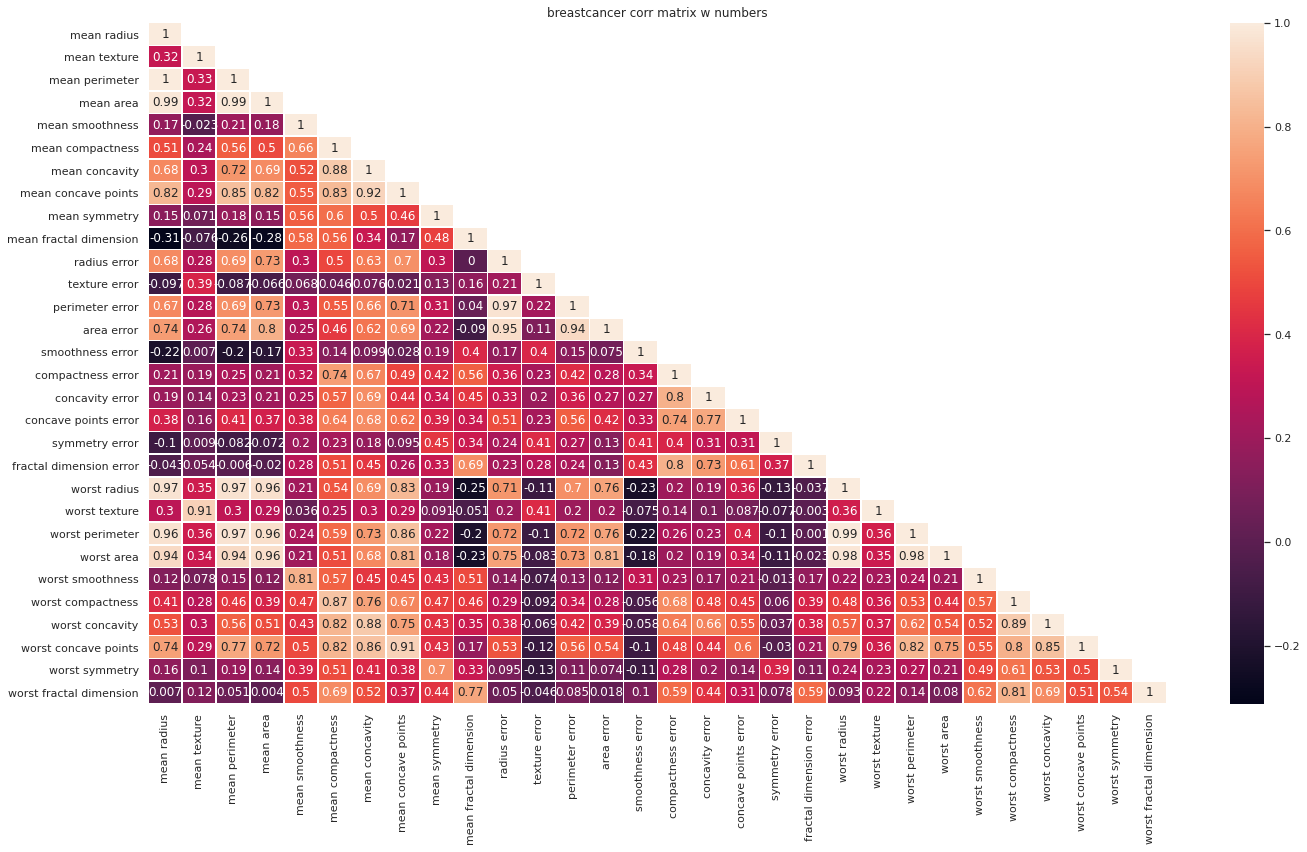

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(round(df_lt, 3), annot=True, linewidths=0.5)
plt.title('breastcancer corr matrix w numbers')
plt.tight_layout()
plt.show()


In [ ]:
# jointplot
# http://alanpryorjr.com/visualizations/seaborn/jointplot/jointplot/
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

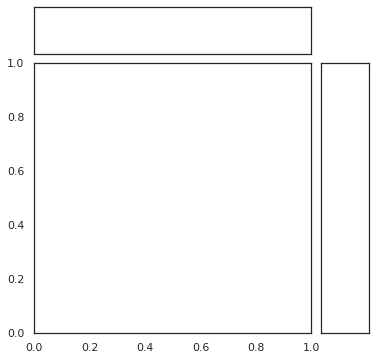

In [ ]:
joint = sns.jointplot('CurrentValue', 'SalesPrice', data=df)
joint.fig.set_size_inches(14,6)
joint.annotate(stats.spearmanr)
joint.ax_joint.set_xlabel('CurrentValue', size=14)
joint.ax_joint.set_ylabel('SalesPrice', size=14)

